In [1]:
%load_ext autoreload 
%autoreload 2 
import matplotlib.pyplot as plt 
import pandas as pd 
import numpy as np 
import os, sys
from skimage.io import imread, imshow
import seaborn as sns
%matplotlib inline

In [2]:
dir_pth = 'c:/Users/kent/.kaggle/competitions/human-protein-atlas-image-classification/'
train_dir = dir_pth+'/train/'
test_dir = dir_pth+'/test/'


In [3]:
train_df = pd.read_csv(dir_pth+'/train.csv')

In [32]:
def oversample_multilabel(df):
    df['temp'] = [[int(i) for i in s.split()] for s in df['Target']]  
    multi = [1,1,1,1,1,1,1,1,4,4,4,1,1,1,1,4,
            1,1,1,1,2,1,1,1,1,1,1,4]
    res_df = pd.DataFrame()
    for i in range(len(multi)):
        mask = df['temp'].apply(lambda x: i in x)
        temp_df = df[mask]
        pre = len(res_df)
        for j in range(multi[i]):
            res_df = res_df.append(temp_df, ignore_index=True)
        print('-> Oversample {} from {} samples to {} samples'.format(i, len(temp_df) ,len(res_df)-pre))
    del res_df['temp']
    res_df.index = range(len(res_df))
    return res_df

train_df = oversample_multilabel(train_df)

-> Oversample 0 from 153419 samples to 153419 samples
-> Oversample 1 from 16896 samples to 16896 samples
-> Oversample 2 from 50090 samples to 50090 samples
-> Oversample 3 from 13654 samples to 13654 samples
-> Oversample 4 from 10920 samples to 10920 samples
-> Oversample 5 from 24144 samples to 24144 samples
-> Oversample 6 from 13964 samples to 13964 samples
-> Oversample 7 from 26970 samples to 26970 samples
-> Oversample 8 from 5007 samples to 20028 samples
-> Oversample 9 from 17811 samples to 71244 samples
-> Oversample 10 from 16723 samples to 66892 samples
-> Oversample 11 from 7958 samples to 7958 samples
-> Oversample 12 from 8358 samples to 8358 samples
-> Oversample 13 from 7205 samples to 7205 samples
-> Oversample 14 from 9113 samples to 9113 samples
-> Oversample 15 from 4263 samples to 17052 samples
-> Oversample 16 from 13605 samples to 13605 samples
-> Oversample 17 from 5648 samples to 5648 samples
-> Oversample 18 from 9961 samples to 9961 samples
-> Oversample 1

In [9]:
label_names = {
    0:  "Nucleoplasm",  
    1:  "Nuclear membrane",   
    2:  "Nucleoli",   
    3:  "Nucleoli fibrillar center",   
    4:  "Nuclear speckles",
    5:  "Nuclear bodies",   
    6:  "Endoplasmic reticulum",   
    7:  "Golgi apparatus",   
    8:  "Peroxisomes",   
    9:  "Endosomes",   
    10:  "Lysosomes",   
    11:  "Intermediate filaments",   
    12:  "Actin filaments",   
    13:  "Focal adhesion sites",   
    14:  "Microtubules",   
    15:  "Microtubule ends",   
    16:  "Cytokinetic bridge",   
    17:  "Mitotic spindle",   
    18:  "Microtubule organizing center",   
    19:  "Centrosome",   
    20:  "Lipid droplets",   
    21:  "Plasma membrane",   
    22:  "Cell junctions",   
    23:  "Mitochondria",   
    24:  "Aggresome",   
    25:  "Cytosol",   
    26:  "Cytoplasmic bodies",   
    27:  "Rods & rings"
}

reverse_train_labels = dict((v,k) for k,v in label_names.items())

def fill_targets(row):
    row.Target = np.array(row.Target.split(" ")).astype(np.int)
    for num in row.Target:
        name = label_names[int(num)]
        row.loc[name] = 1
    return row

In [12]:
for key in label_names.keys():
    train_df[label_names[key]] = 0

In [13]:
train_labels = train_df.apply(fill_targets, axis=1)

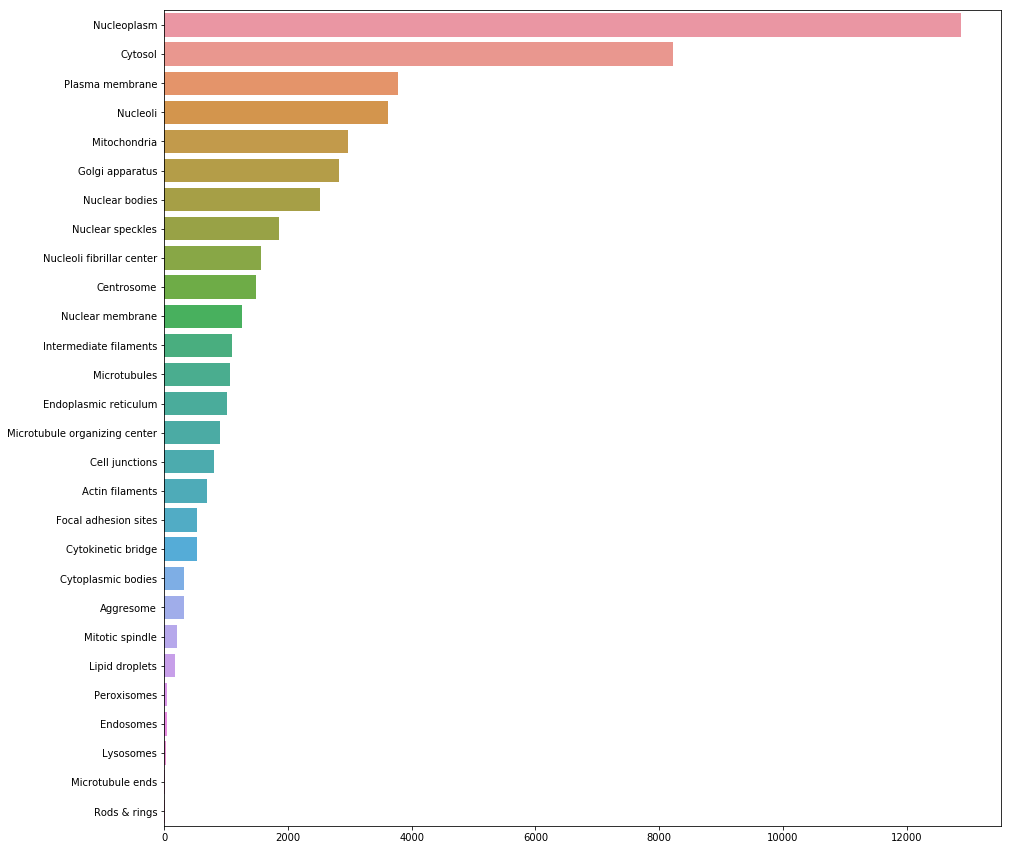

In [17]:
target_counts = train_labels.drop(["Id", "Target"],axis=1).sum(axis=0).sort_values(ascending=False)
plt.figure(figsize=(15,15))
sns.barplot(y=target_counts.index.values, x=target_counts.values, order=target_counts.index)

In [44]:
def load_image(basepath, image_id):
    images = np.zeros(shape=(4,512,512))
    images[0,:,:] = imread(basepath + image_id + "_green" + ".png")
    images[1,:,:] = imread(basepath + image_id + "_red" + ".png")
    images[2,:,:] = imread(basepath + image_id + "_blue" + ".png")
    images[3,:,:] = imread(basepath + image_id + "_yellow" + ".png")
    return images

def make_image_row(image, subax, title):
    subax[0].imshow(image[0], cmap="Greens")
    subax[1].imshow(image[1], cmap="Reds")
    #subax[1].set_title("stained microtubules")
    subax[2].imshow(image[2], cmap="Blues")
    #subax[2].set_title("stained nucleus")
    subax[3].imshow(image[3], cmap="Oranges")
    #subax[3].set_title("stained endoplasmatic reticulum")
    subax[0].set_title(title)
    return subax

def make_title(file_id):
    file_targets = train_labels.loc[train_labels.Id==file_id, "Target"].values[0]
    title = " - "
    for n in file_targets:
        title += label_names[n] + " - "
    return title


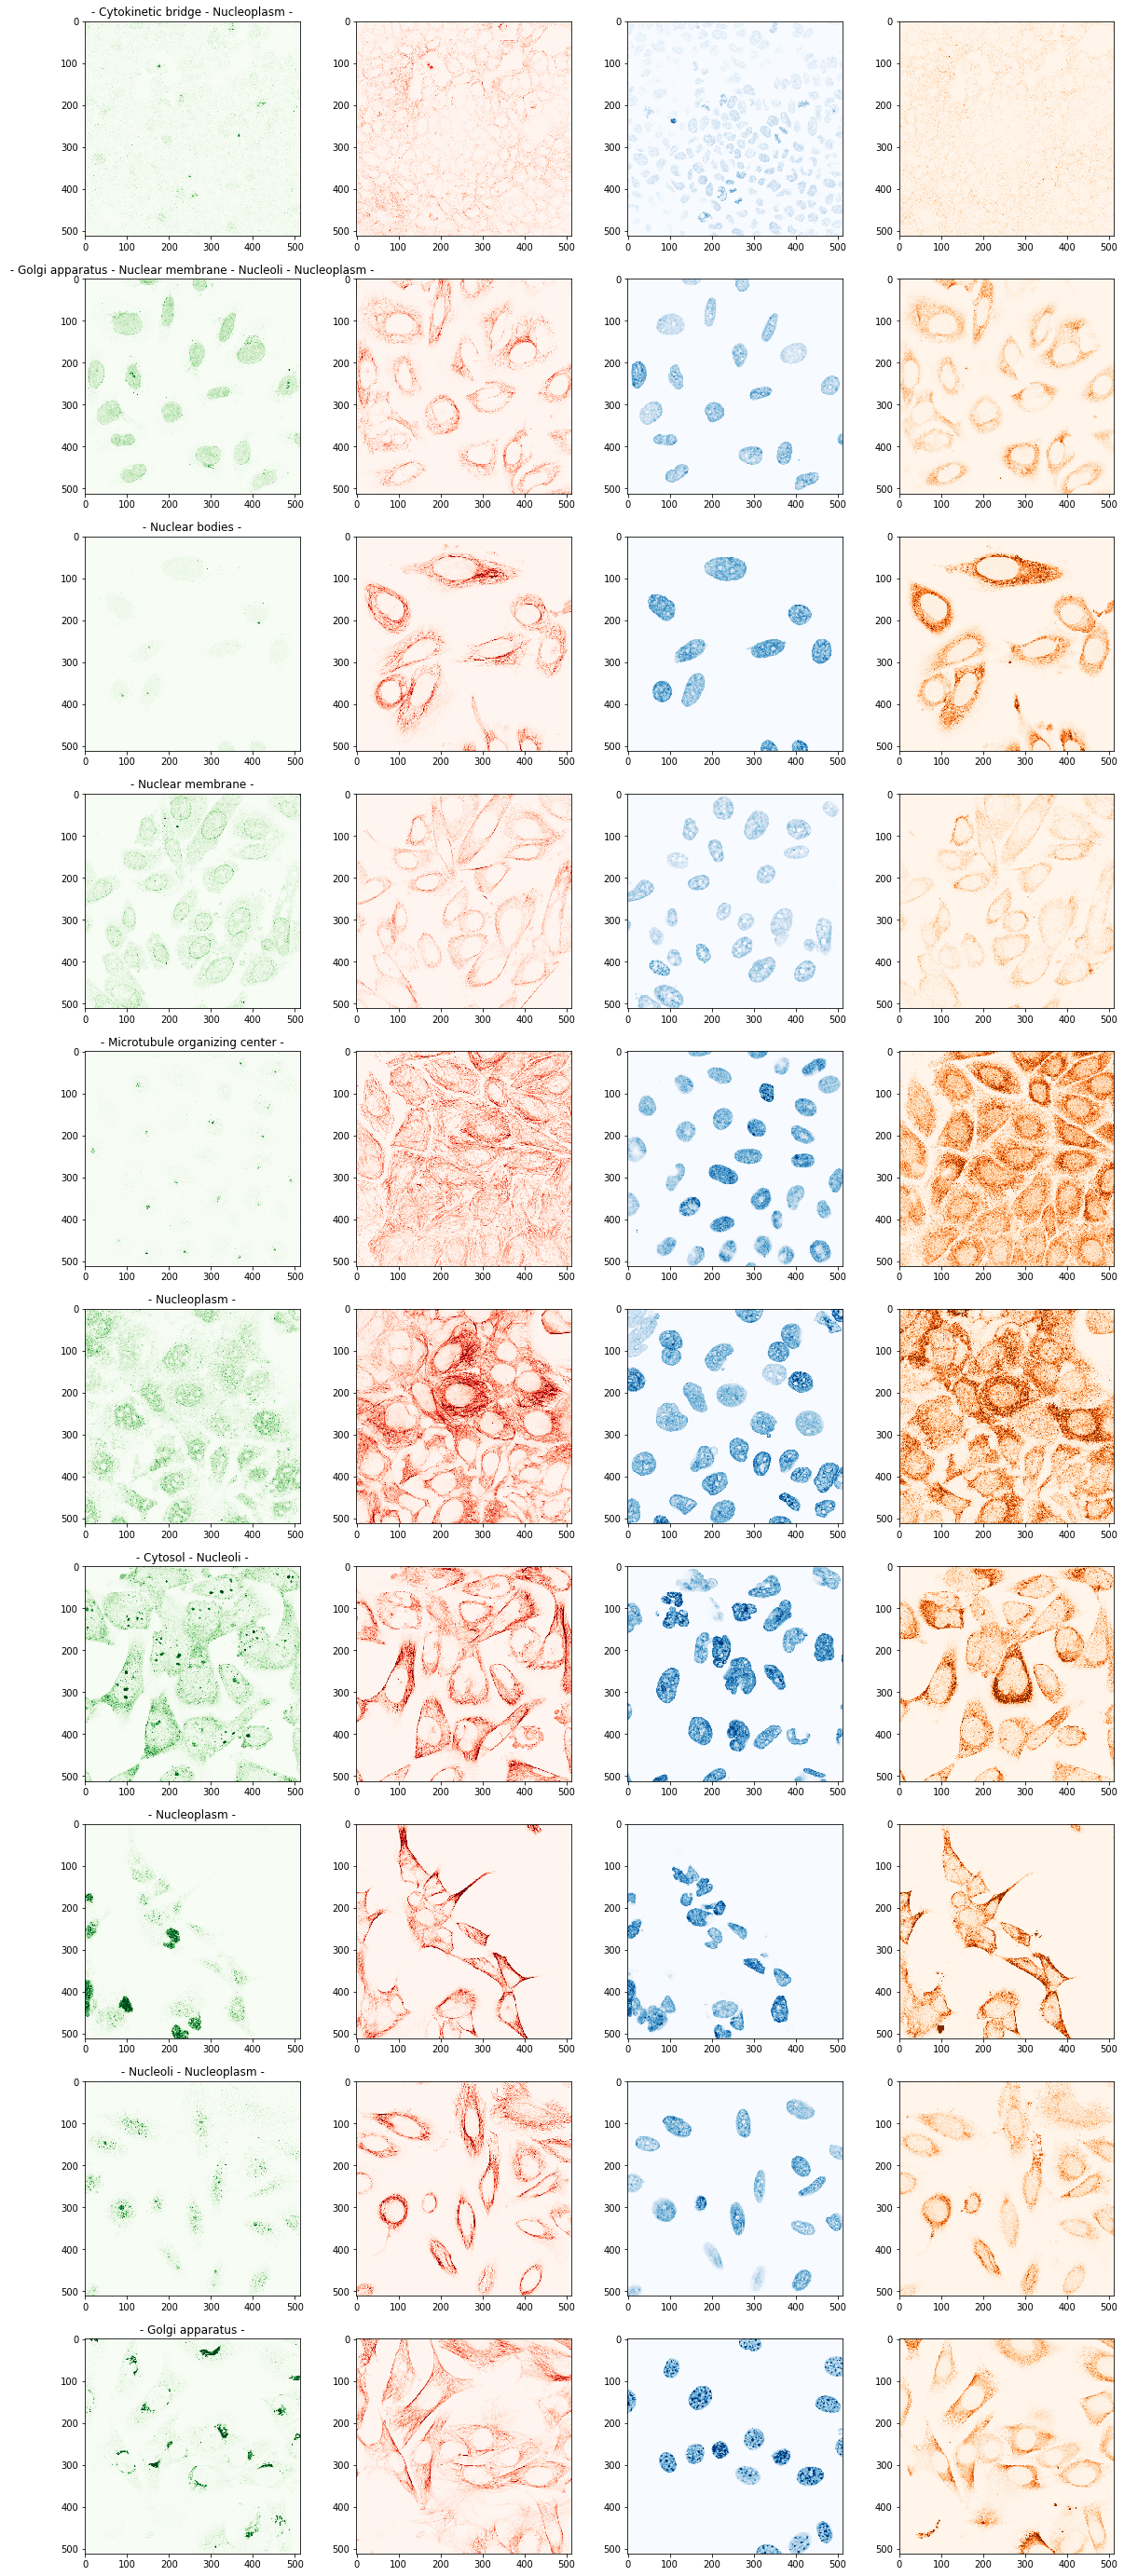

In [45]:
# load_image(train_dir, train_labels['Id'][1])

file_ids = train_labels['Id'][:10]

fig, ax = plt.subplots(len(file_ids),4,figsize=(20,5*len(file_ids)))
if ax.shape == (4,):
    ax = ax.reshape(1,-1)
for n in range(len(file_ids)):
    images = load_image(train_dir, file_ids[n] )
    make_image_row(images, ax[n], make_title(file_ids[n]))

C:\Users\kent\Anaconda3\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:51: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  out_of_range_float = (np.issubdtype(image.dtype, np.float) and
C:\Users\kent\Anaconda3\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:77: UserWarning: Float image out of standard range; displaying image with stretched contrast.
  warn("Float image out of standard range; displaying "


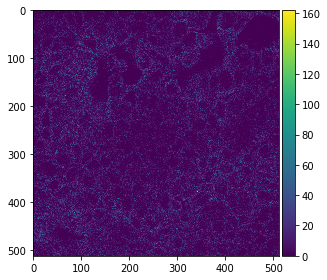

In [37]:
imshow(images[3],  )

In [23]:
def load_image(basepath, image_id):
    images = np.zeros(shape=(4,512,512))
    images[0,:,:] = imread(basepath + image_id + "_green" + ".png")
    images[1,:,:] = imread(basepath + image_id + "_red" + ".png")
    images[2,:,:] = imread(basepath + image_id + "_blue" + ".png")
    images[3,:,:] = imread(basepath + image_id + "_yellow" + ".png")
    return images

,Id,Target,Nucleoplasm,Nuclear membrane,Nucleoli,Nucleoli fibrillar center,Nuclear speckles,Nuclear bodies,Endoplasmic reticulum,Golgi apparatus,...,Microtubule organizing center,Centrosome,Lipid droplets,Plasma membrane,Cell junctions,Mitochondria,Aggresome,Cytosol,Cytoplasmic bodies,Rods & rings
0,00070df0-bbc3-11e8-b2bc-ac1f6b6435d0,"[16, 0]",1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,000a6c98-bb9b-11e8-b2b9-ac1f6b6435d0,"[7, 1, 2, 0]",1,1,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,000a9596-bbc4-11e8-b2bc-ac1f6b6435d0,[5],0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,000c99ba-bba4-11e8-b2b9-ac1f6b6435d0,[1],0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,001838f8-bbca-11e8-b2bc-ac1f6b6435d0,[18],0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
